# Import and CD

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/5205/Data_File

/content/drive/MyDrive/5205/Data_File


In [3]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import warnings
import time
import os

warnings.filterwarnings("ignore")

# Data Downloaded (502 constituent stock and SP500 index) + Data Loaded

df 是SP500的表格对象

In [4]:
"""
下载标普500数据
"""
# SP500 = yfinance.Ticker('^GSPC')
# df = yfinance.download(tickers='^GSPC', start="2022-06-01", end="2025-02-01", interval="1d")
# df.columns = df.columns.get_level_values(0)
# df.head()
# df.to_csv("./Ticker_Data/SP500.csv")

'\n下载标普500数据\n'

In [5]:
"""
下载总成分股表，已保存在共享的Drive里了
"""
# all = yfinance.download(tickers=ticker_list, start="2022-06-01", end="2025-02-01", interval="1d") # 下载在该时间段所有成分股
# path = Path("./Ticker_Data")
# path.mkdir(parents=True, exist_ok=True)
# all.to_csv("./Ticker_Data/All.csv", index=True) # 保存在云端硬盘中，['BRK.B', 'BF.B']异常Tickers = ('Berkshire Hathaway', 'Brown–Forman')

'\n下载总成分股表，已保存在共享的Drive里了\n'

In [6]:
"""
导入总成分股表和SP500表
"""
df = pd.read_csv("./Ticker_Data/SP500.csv", index_col=0, header=0)
df.name = "SP500 Index"
df_all = pd.read_csv("./Ticker_Data/All.csv", header=[0, 1], index_col=0)
df_all.name = "All Tickers Stock Information"
df_summary = pd.read_csv("./Summary.csv").set_index("ticker")
df_summary.name = "All Tickers Fundemantal Information"

"""
加载Tickers.json
"""
with open("Tickers.json", "r") as f:
    tickers = json.load(f)
ticker_list = list(tickers.keys()) # 标普五百的成分股tickers
ticker_name = list(tickers.values()) # 标普五百成分股的全称
len(ticker_list)

502

In [7]:
print(df.name)
df.sample()

SP500 Index


,Close,High,Low,Open,Volume
Date,,,,,
2022-09-06,3908.189941,3942.550049,3886.75,3930.889893,4127340000


In [8]:
print(df_all.name)
df_all.sample()

All Tickers Stock Information


Price      Adj Close            Close                                 \
Ticker          BF.B BRK.B          A        AAPL        ABBV   ABNB   
Date                                                                   
2023-07-27       NaN   NaN  125.05645  191.555481  139.559555  148.5   

Price                                                      ...   Volume  \
Ticker             ABT       ACGL         ACN        ADBE  ...      WST   
Date                                                       ...            
2023-07-27  108.760712  75.758087  312.479919  513.969971  ...  1021900   

Price                                                                       \
Ticker          WTW       WY     WYNN      XEL       XOM      XYL      YUM   
Date                                                                         
2023-07-27  1787100  3328900  1997800  4046300  17677900  1226600  1385100   

Price                        
Ticker          ZBH    ZBRA  
Date                         
2023-07-27  1441600  493900  

[1 rows x 2512 columns]

In [9]:
print(df_summary.name)
df_summary.sample()

All Tickers Fundemantal Information


,industry,marketCap,beta,fullTimeEmployees,companyOfficers,overallRisk,auditRisk,boardRisk,compensationRisk,dividendYield,recommendationKey,returnOnAssets,returnOnEquity,grossProfits,freeCashflow
ticker,,,,,,,,,,,,,,,
EA,Electronic Gaming & Multimedia,3.794859e+10,0.786,13700.0,"[{'maxAge': 1, 'name': 'Mr. Andrew Wilson', '...",3.0,7.0,5.0,6.0,0.52,buy,0.07121,0.14038,5.832000e+09,1.651125e+09


## Key Info
- "industry": 行业划分
- "marketCap": 总市值
- "beta": 大盘收益敏感性

- "fullTimeEmployees": 公司全日制员工数量
- "companyOfficers": 可以查到管理层信息
- "overallRisk": 综合风险评级None-10
  - "auditRisk": 审计风险评级None-10（审计人员在审计过程中未能发现重大错报的可能性）
  - "boardRisk": 管理层风险评级None-10
  - "compensationRisk": 薪酬结构风险None-10
  - ...
- "dividendYield": 股息收益率Dividend per share / Price per share
- "recommendationKey": Yahoo给的指导买卖建议？
- 'returnOnAssets'
- 'returnOnEquity'
- 'grossProfits'
- 'freeCashflow'

In [10]:
"""
下载不同成分股的Key Info DataFrame
"""
# template = []
# for ticker in ticker_list:
#   t = yfinance.Ticker(ticker)
#   template.append(
#       {
#           "ticker": ticker,
#           "industry": t.info.get("industry"),
#           "marketCap": t.info.get("marketCap"),
#           "beta": t.info.get("beta"),
#           "fullTimeEmployees": t.info.get("fullTimeEmployees"),
#           "companyOfficers": t.info.get("companyOfficers"),
#           "overallRisk": t.info.get("overallRisk"),
#           "auditRisk": t.info.get("auditRisk"),
#           "boardRisk": t.info.get("boardRisk"),
#           "compensationRisk": t.info.get("compensationRisk"),
#           "dividendYield": t.info.get("dividendYield"),
#           "recommendationKey": t.info.get("recommendationKey"),
#           "returnOnAssets": t.info.get("returnOnAssets"),
#           "returnOnEquity": t.info.get("returnOnEquity"),
#           "grossProfits": t.info.get("grossProfits"),
#           "freeCashflow": t.info.get("freeCashflow")
#       }
#   )
#   time.sleep(0.1)
# df_summary = pd.DataFrame(template)
# df_summary.to_csv("./Summary.csv", index=False)
# df_summary.shape

'\n下载不同成分股的Key Info DataFrame\n'

# Data Description

## Self Made Function

In [11]:
def change_name(row):
  """
  给Tickers加上原本公司的姓名
  """
  row["Real_Name1"] = tickers[row["Ticker1"]]
  row["Real_Name2"] = tickers[row["Ticker2"]]
  return row[["Ticker1", "Real_Name1", "Ticker2", "Real_Name2", "Correlation"]]

## Graph

In [12]:
"""
根据相关系数，筛出最相关的
"""
cor = df_all.loc[:, "Close"].corr(method="spearman")

cor_top_k = 100 # 前k项
mask = ~np.eye(cor.shape[0], dtype=bool)
mask = np.triu(mask)
cor_ = cor.where(mask).stack().rename_axis(["Ticker1", "Ticker2"])
cor_.name = "Correlation"
top_k_index = abs(cor_).sort_values(ascending=False).index[:cor_top_k] # (124750,)
top_k_cor = cor_.loc[top_k_index]
top_k_cor_addname = top_k_cor.reset_index().apply(change_name, axis=1)
top_k_cor_addname

,Ticker1,Real_Name1,Ticker2,Real_Name2,Correlation
0,GOOG,Alphabet Inc. (Class C),GOOGL,Alphabet Inc. (Class A),0.999928
1,NWS,News Corp (Class B),NWSA,News Corp (Class A),0.997952
2,FOX,Fox Corporation (Class B),FOXA,Fox Corporation (Class A),0.994150
3,DHI,D. R. Horton,LEN,Lennar,0.992151
4,NVR,"NVR, Inc.",PHM,PulteGroup,0.989771
...,...,...,...,...,...
95,CTAS,Cintas,TT,Trane Technologies,0.979267
96,ANET,Arista Networks,LII,Lennox International,0.979252
97,BSX,Boston Scientific,GE,GE Aerospace,0.979248
98,IRM,Iron Mountain,MMC,Marsh McLennan,0.979122


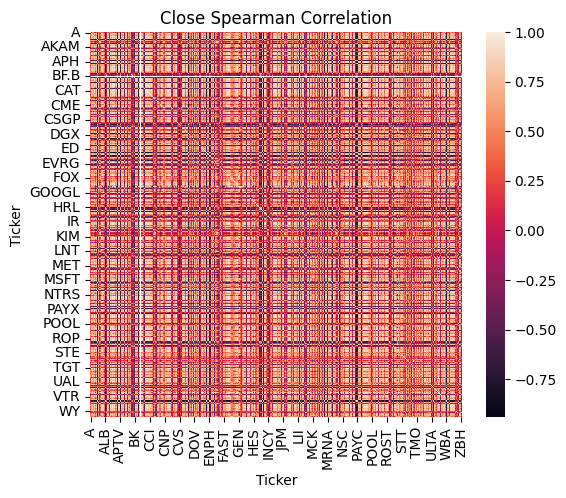

In [13]:
fig = plt.figure("Spearman Correlation", figsize=(6, 5)) # Close的Spearman相关系数
sns.heatmap(cor)
plt.title("Close Spearman Correlation")
plt.show()

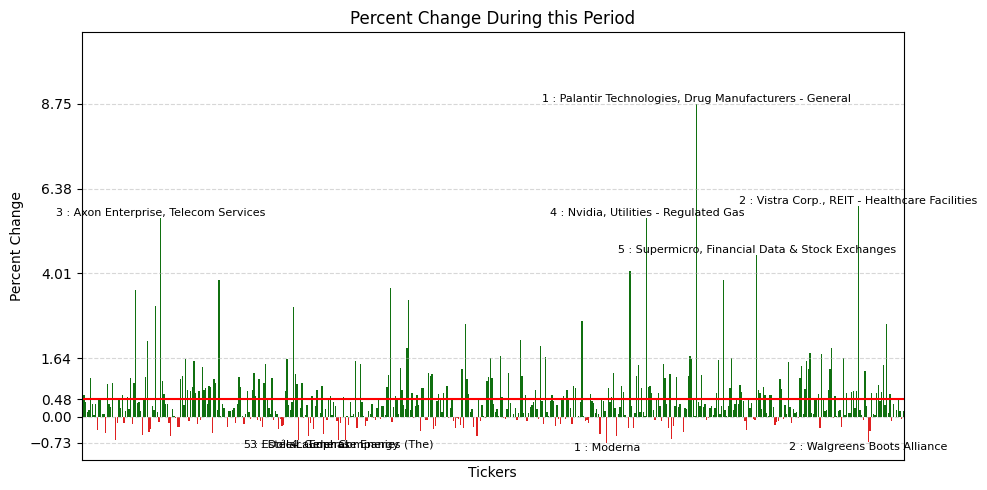

In [17]:
top_k = 5

fig = plt.figure("Profit PCT", figsize=(10, 5))
ax1 = fig.add_subplot(111) # 初始和末尾各公司的收盘价增长率
ax1.set_title("Percent Change During this Period")
ax1.set_xlabel("Tickers")
ax1.set_ylabel("Percent Change")
all_close = df_all.Close
all_close_pct_change = ((all_close.iloc[-1] - all_close.iloc[0]) / all_close.iloc[0]).dropna()
index_profit = np.argsort(all_close_pct_change.values)[::-1]
top_k_x = index_profit[:top_k] # top 5 标注
top_k_y = all_close_pct_change.values[top_k_x]
bot_k_x = index_profit[-top_k:]
bot_k_y = all_close_pct_change.values[bot_k_x]
ticks = np.linspace(min(all_close_pct_change), max(all_close_pct_change), 5).round(2)
ticks = np.append(ticks, [0, np.round(all_close_pct_change.mean(), 2)])
palette = ['green' if x >= 0 else 'red' for x in all_close_pct_change]
ax1.axhline(y=all_close_pct_change.mean(), linestyle="-", c="red") # 平均增长率
sns.barplot(data=all_close_pct_change, ax=ax1, palette=palette)
for i in range(top_k):
  x = top_k_x[i]
  y = top_k_y[i]
  industry = df_summary.industry.iloc[index_profit[i]]
  words = str(i+1) + " : " + tickers.get(all_close_pct_change.index[x]) + ", " + industry
  ax1.text(x, y, words, fontsize=8, ha="center", va="bottom")
for i in range(top_k):
  x = bot_k_x[i]
  y = bot_k_y[i]
  ax1.text(x, y, str(top_k - i) + " : " + tickers.get(all_close_pct_change.index[x]), fontsize=8, ha="center", va="top")
ax1.set_ylim(min(all_close_pct_change) - 0.5, max(all_close_pct_change) + 2)
ax1.set_yticks(list(ticks))
ax1.set_xticks([])
ax1.grid(linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [18]:
df_summary.select_dtypes(include="object")

,industry,companyOfficers,recommendationKey
ticker,,,
MMM,Conglomerates,"[{'maxAge': 1, 'name': 'Mr. William M. Brown',...",buy
AOS,Specialty Industrial Machinery,"[{'maxAge': 1, 'name': 'Mr. Kevin J. Wheeler',...",buy
ABT,Medical Devices,"[{'maxAge': 1, 'name': 'Mr. Robert B. Ford', '...",buy
ABBV,Drug Manufacturers - General,"[{'maxAge': 1, 'name': 'Mr. Richard A. Gonzale...",buy
ACN,Information Technology Services,"[{'maxAge': 1, 'name': 'Ms. Julie T. Spellman ...",buy
...,...,...,...
XEL,Utilities - Regulated Electric,"[{'maxAge': 1, 'name': 'Mr. Robert C. Frenzel'...",buy
XYL,Specialty Industrial Machinery,"[{'maxAge': 1, 'name': 'Mr. Matthew Francis Pi...",buy
YUM,Restaurants,"[{'maxAge': 1, 'name': 'Mr. David W. Gibbs', '...",hold


In [19]:
df_summary.recommendationKey.value_counts()

,count
recommendationKey,
buy,371
hold,99
strong_buy,22
none,6
underperform,2


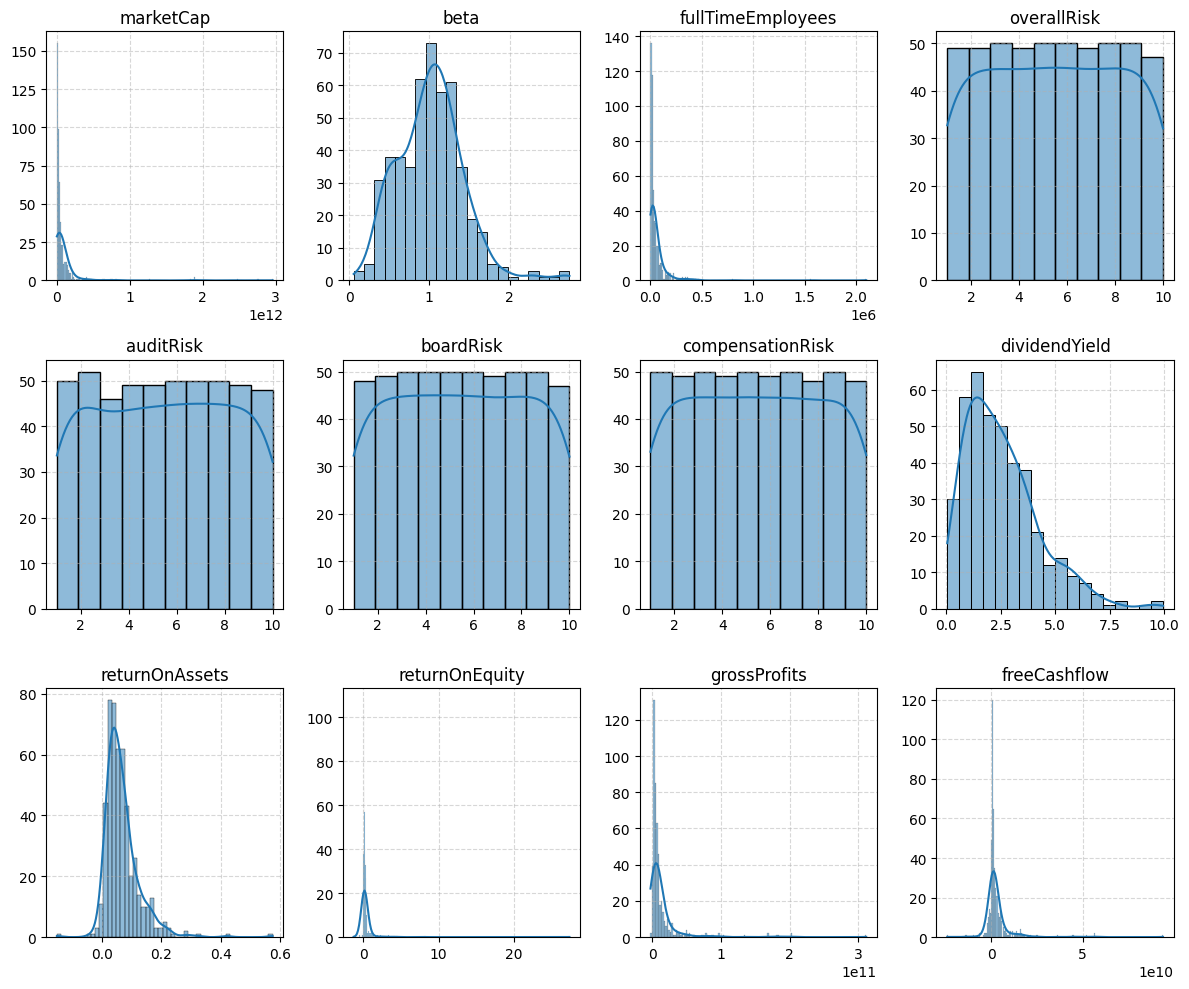

In [20]:
temp = df_summary.select_dtypes(include=np.number)
fig, axies = plt.subplots(3, 4, figsize=(12, 10))
axies = axies.flatten()

for i in range(12):
  axies[i].set_title(temp.columns[i])
  sns.histplot(temp.iloc[:, i], kde=True, ax=axies[i])
  axies[i].set_xlabel("")
  axies[i].set_ylabel("")
  axies[i].grid(linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [72]:
df_summary.industry.value_counts()

,count
industry,
Utilities - Regulated Electric,23
Software - Application,17
Specialty Industrial Machinery,16
Software - Infrastructure,13
Semiconductors,13
...,...
Rental & Leasing Services,1
Pollution & Treatment Controls,1
Drug Manufacturers - Specialty & Generic,1


AttributeError: 'Axes' object has no attribute 'barplot'

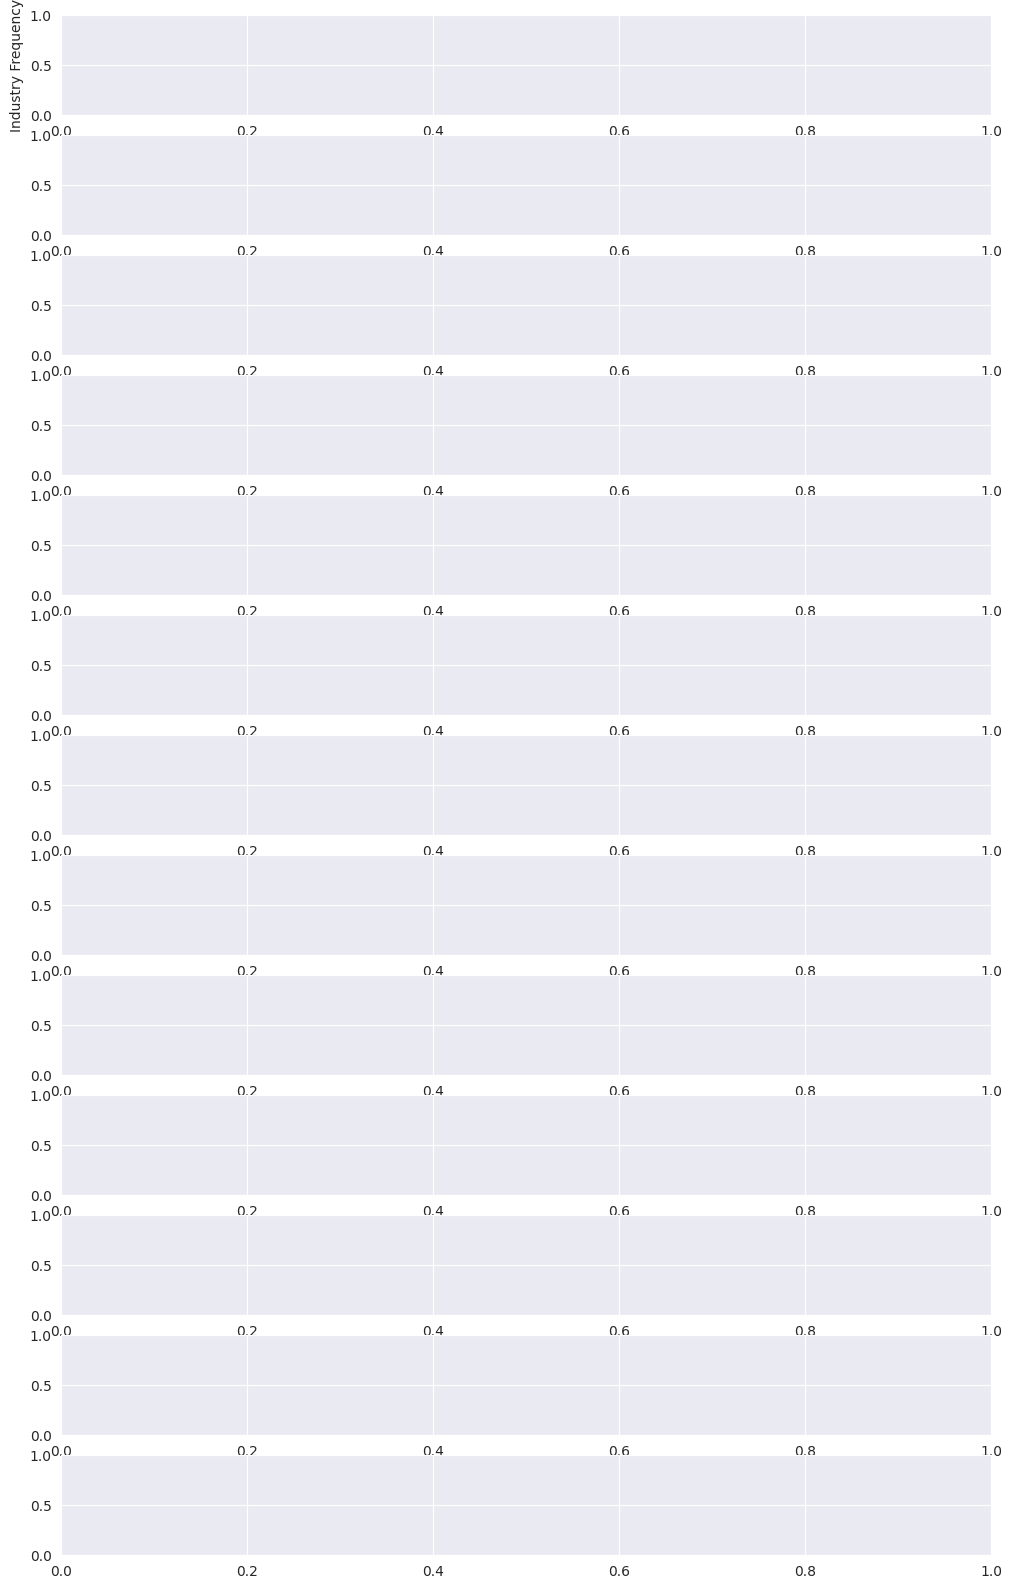

In [73]:
# df_group_mean = df_summary.groupby("industry").apply(lambda sub: pd.Series({
#     "marketCap.Mean": sub.marketCap.mean(),
#     "beta.Mean": sub.beta.mean(),
#     "fullTimeEmployees.Mean": sub.fullTimeEmployees.mean(),
#     "overallRisk.Mean": sub.overallRisk.mean(),
#     "auditRisk.Mean": sub.auditRisk.mean(),
#     "boardRisk.Mean": sub.boardRisk.mean(),
#     "compensationRisk.Mean": sub.compensationRisk.mean(),
#     "dividendYield.Mean": sub.dividendYield.mean(),
#     "returnOnAssets.Mean": sub.returnOnAssets.mean(),
#     "returnOnEquity.Mean": sub.returnOnEquity.mean(),
#     "grossProfits.Mean": sub.grossProfits.mean(),
#     "freeCashflow.Mean": sub.freeCashflow.mean()
# }))

df_number_summary = df_summary.select_dtypes(include=np.number)

fig, axes = plt.subplots(df_number_summary.shape[1]+1, 1, figsize=(12, 20))
axes = axes.flatten()

axes[0].set_ylabel("Industry Frequency")
axes[0].bar(df_summary.industry.value_counts())
axes[0].grid(linestyle="--", alpha=0.8, c="gray")

for i in range(1, len(axes)):
  sns.barplot(df_summary, x="industry", y=df_number_summary.columns[i], color="lightgreen")
  axes[i].grid(linestyle="--", alpha=0.8, c="gray")

  if i < len(axes) - 1:
    axes[i].set_xticklabels("")
    axes[i].set_xlabel("")
  else:
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, fontsize=8)

sns.set_style("darkgrid")
plt.tight_layout()
plt.show()

In [42]:
ax1.get_y()

[Text(0, 0.0, '0'),
 Text(0, 1000000000000.0, '1'),
 Text(0, 2000000000000.0, '2'),
 Text(0, 3000000000000.0, '3'),
 Text(0, 4000000000000.0, '4')]

In [21]:
"""
行业 Section count
"""
mean_section = df_summary.industry.value_counts().mean().astype(int)
mask = df_summary.industry.value_counts() > df_summary.industry.value_counts().mean()
other_section = pd.Series({f"Average(other<={mean_section})":df_summary.industry.value_counts()[~mask].mean()})
other_section.name = "count"
section = pd.concat([df_summary.industry.value_counts()[mask], other_section])

"""
市场份额 Market Cap
"""
mcap_section = df_summary.marketCap.mean().astype(int)
mask = df_summary.marketCap > df_summary.marketCap.mean()
other_mcap = pd.Series({f"Average(other<={mcap_section})":df_summary.marketCap[~mask].mean()})
other_mcap.name = "count"
mcap = pd.concat([df_summary.marketCap[mask], other_mcap])

"""
员工数量
"""
mean_employees = df_summary.fullTimeEmployees.mean().astype(int)
mask = df_summary.fullTimeEmployees > df_summary.fullTimeEmployees.mean()
other_employees = pd.Series({f"Average(other<={mean_employees})":df_summary.fullTimeEmployees[~mask].mean()})
other_employees.name = "count"
employees = pd.concat([df_summary.fullTimeEmployees[mask], other_employees])

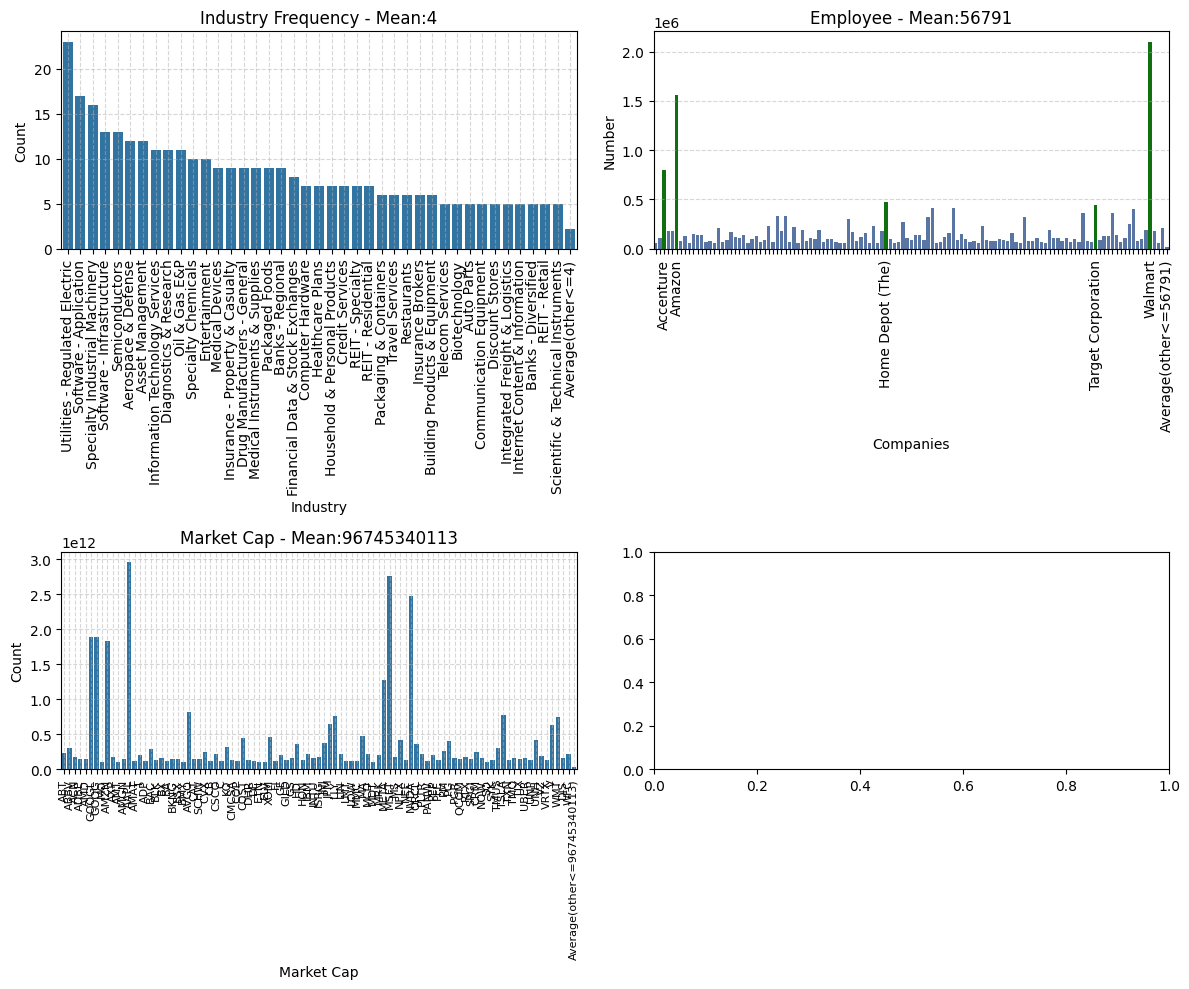

In [23]:
i, j = 2, 2 # 子图维度

fig, axies = plt.subplots(2, 2,figsize=(12, 10))
axies = axies.flatten()
ax3 = axies[0] # 行业分布
ax3.set_title(f"Industry Frequency - Mean:{mean_section}")
ax3.set_xlabel("Industry")
ax3.set_ylabel("Count")
ax3.set_xticklabels(section.index, rotation=90)
sns.barplot(data=section, ax=ax3)
ax3.grid(linestyle="--", alpha=0.5)

ax4 = axies[1] # 员工
index_employees = np.argsort(employees.values)[::-1] # 员工数量
top_index = index_employees[:top_k] # top 5 标注
ax4.set_title(f"Employee - Mean:{mean_employees}")
ax4.set_xlabel("Companies")
ax4.set_ylabel("Number")
palette = ["#4C72B0"] * employees.shape[0]
labels = [""] * employees.shape[0]
labels[-1] = other_employees.index[0]
for i in top_index:
    labels[i] = tickers.get(f"{employees.index[i]}")
    palette[i] = "green"
ax4.set_xticklabels(labels, rotation=90)
sns.barplot(data=employees, ax=ax4, palette=palette)
ax4.grid(linestyle="--", alpha=0.5, axis="y")

ax1 = axies[2] # 市场份额
ax1.set_title(f"Market Cap - Mean:{mcap_section}")
ax1.set_xlabel("Market Cap")
ax1.set_ylabel("Count")
ax1.set_xticklabels(mcap.index, rotation=90, fontsize=8)
ax1.set_xticklabels(mcap.index, rotation=90)
sns.barplot(data=mcap, ax=ax1)
ax1.grid(linestyle="--", alpha=0.5)

ax2 = axies[3]

plt.tight_layout()
plt.show()

# Features

In [27]:
def add_feature(df, n=10):
  def calculate_rsi(prices, window=14):
    """
    Calculate the Relative Strength Index (RSI) for a price series.

    Parameters:
    prices (pd.Series): The price series.
    window (int): The lookback period for calculating RSI (default is 14).

    Returns:
    pd.Series: The RSI values.
    """
    # Compute price changes
    price_changes = prices.diff()

    # Separate gains and losses
    gains = price_changes.where(price_changes > 0, 0)
    losses = abs(price_changes.where(price_changes < 0, 0))  # Take absolute value of losses

    # Calculate average gains and losses using rolling mean
    avg_gains = gains.rolling(window=window, min_periods=1).mean()
    avg_losses = losses.rolling(window=window, min_periods=1).mean()

    # Calculate Relative Strength (RS)
    rs = avg_gains / avg_losses

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

  def calculate_macd(prices, short_window=12, long_window=26, signal_window=9):
      """
      Calculate the Moving Average Convergence Divergence (MACD) for a price series.

      Parameters:
      prices (pd.Series): The price series.
      short_window (int): The short-term EMA period (default is 12).
      long_window (int): The long-term EMA period (default is 26).
      signal_window (int): The signal line EMA period (default is 9).

      Returns:
      pd.DataFrame: A DataFrame containing the MACD line, Signal line, and MACD Histogram.
      """
      # Calculate short-term EMA
      ema_short = prices.ewm(span=short_window, adjust=False).mean()

      # Calculate long-term EMA
      ema_long = prices.ewm(span=long_window, adjust=False).mean()

      # Calculate MACD line
      macd_line = ema_short - ema_long

      # Calculate Signal line
      signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()

      # Calculate MACD Histogram
      macd_histogram = macd_line - signal_line

      # Combine into a DataFrame
      macd_df = pd.DataFrame({
          'macd_line': macd_line,
          'signal_line': signal_line,
          # 'macd_hist': macd_histogram
      })
      return macd_df

  def calculate_stochastic_oscillator(df, window=14):
    pass

  df_ = df.copy()

  df_["PCT_High_Close_Range"] = (df_["High"] - df_["Close"]) / df_["Close"]
  df_["PCT_Low_Close_Range"] = (df_["Close"] - df_["Low"]) / df_["Close"]
  df_["PCT_High_Low_Range"] = (df_["High"] - df_["Low"]) / df_["Close"]
  df_["Return"] = df_.Close / df_.Close.shift(1) - 1
  df_["Volatility"] = df_['Return'].rolling(window=n).std()/(n**0.5)
  df_["MA15"] = df_["Close"].rolling(window=15).mean()
  df_["MA30"] = df_["Close"].rolling(window=30).mean()
  df_["MA150"] = df_["Close"].rolling(window=150).mean()
  df_["RSI"] = calculate_rsi(df_["Close"])
  df_[["MACD", "Signal_MACD"]] = calculate_macd(df_["Close"])

  df_ = df_.dropna()
  return df_

def process_data(df, n=10):
  df_ = df.copy()
  data = []
  for i in range(0, df_.shape[0] - n + 1):
    data.append(df_.iloc[i:i+n].values)
  return np.array(data)

In [26]:
df_featured = add_feature(df)
df_featured.corr()

,Close,High,Low,Open,Volume,PCT_High_Close_Range,PCT_Low_Close_Range,PCT_High_Low_Range,Return,Volatility,MA15,MA30,MA150,RSI,MACD,Signal_MACD
Close,1.000000,0.999393,0.999584,0.998852,-0.064122,-0.083514,-0.125458,-0.190182,0.020410,-0.168102,0.993258,0.988636,0.977530,0.150331,0.276454,0.303179
High,0.999393,1.000000,0.999403,0.999593,-0.057409,-0.049107,-0.139951,-0.168180,-0.002475,-0.161220,0.994700,0.990419,0.979205,0.137910,0.269203,0.299608
Low,0.999584,0.999403,1.000000,0.999423,-0.066806,-0.071000,-0.153721,-0.201757,0.002995,-0.176163,0.993097,0.988122,0.976276,0.151873,0.282084,0.308718
Open,0.998852,0.999593,0.999423,1.000000,-0.061402,-0.045054,-0.159220,-0.180542,-0.020006,-0.169617,0.994276,0.989609,0.977857,0.140064,0.274908,0.304718
Volume,-0.064122,-0.057409,-0.066806,-0.061402,1.000000,0.198173,0.104776,0.287013,-0.069723,0.151426,-0.054895,-0.048721,-0.043038,-0.067760,-0.076464,-0.051742
PCT_High_Close_Range,-0.083514,-0.049107,-0.071000,-0.045054,0.198173,1.000000,-0.424325,0.636800,-0.665444,0.206727,-0.025496,-0.014592,-0.016311,-0.368530,-0.230759,-0.131187
PCT_Low_Close_Range,-0.125458,-0.139951,-0.153721,-0.159220,0.104776,-0.424325,1.000000,0.427964,0.610153,0.296513,-0.134975,-0.122046,-0.093990,-0.063050,-0.225392,-0.231320
PCT_High_Low_Range,-0.190182,-0.168180,-0.201757,-0.180542,0.287013,0.636800,0.427964,1.000000,-0.144648,0.458812,-0.140377,-0.118484,-0.096311,-0.421518,-0.422240,-0.327904
Return,0.020410,-0.002475,0.002995,-0.020006,-0.069723,-0.665444,0.610153,-0.144648,1.000000,0.049846,-0.029252,-0.024512,-0.012226,0.215093,-0.005577,-0.072235
Volatility,-0.168102,-0.161220,-0.176163,-0.169617,0.151426,0.206727,0.296513,0.458812,0.049846,1.000000,-0.143717,-0.102279,-0.059939,-0.462141,-0.574986,-0.560199


In [19]:
loaded_data = process_data(df_featured, n=100)
loaded_data.shape

(422, 100, 16)

# Baseline